<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A0%D0%B8%D1%81%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BD%D0%B0_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">Рисование на изображении</b></h1>

В этом уроке научимся рисовать геометрические фигуры, рисовать на входных изображениях.

In [ ]:
# import the necessary packages
# импортируем необходимые модули
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

Загрузка файлов

In [ ]:
!wget http://dataudt.ru/datasets/cv/Lesson_03.Drawing.zip
!unzip Lesson_03.Drawing.zip
%cd /content/Lesson_03.Drawing

--2022-01-22 11:06:01--  http://dataudt.ru/datasets/cv/Lesson_03.Drawing.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 906597 (885K) [application/zip]
Saving to: ‘Lesson_03.Drawing.zip’

Lesson_03.Drawing.z 100%[===================>] 885.35K  1.17MB/s    in 0.7s    

2022-01-22 11:06:02 (1.17 MB/s) - ‘Lesson_03.Drawing.zip’ saved [906597/906597]

Archive:  Lesson_03.Drawing.zip
  inflating: Lesson_03.Drawing/Drawing.py  
  inflating: Lesson_03.Drawing/lion.png  
/content/Lesson_03.Drawing


In [ ]:
# construct the argument parser and parse the arguments
# создадим парсер и укажем аргументы
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="Path to the image")
# args = vars(ap.parse_args())
# пока мы используем Jupyter Notebooks мы можем заменить наш парсер
# явными аргументами и значениями
args = {
	"image": "/content/Lesson_02.Image_coordinates/lion.png",

}

In [ ]:
# import the necessary packages
# импортируем необходимые модули
import numpy as np
import cv2

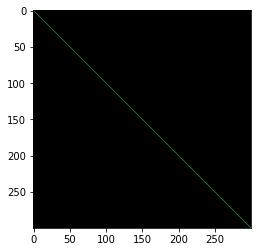

In [ ]:
# initialize our canvas as a 300x300 with 3 channels, Red, Green,
# and Blue, with a black background
# инициализируем наш холст как 300x300 с 3 каналами,
# красным, зеленым и синим, с черным фоном
canvas = np.zeros((300, 300, 3), dtype="uint8")

# draw a green line from the top-left corner of our canvas to the
# bottom-right
# рисуем зеленую линию от верхнего левого угла 
# нашего холста к нижнему правому
green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)
plt.imshow(canvas)
plt.show()

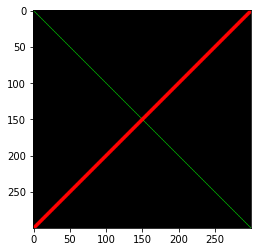

In [ ]:
# now, draw a 3 pixel thick red line from the top-right corner to the
# bottom-left
# теперь нарисуем красную линию толщиной 3 пикселя
# от верхнего правого угла к нижнему левому
red = (255, 0, 0)
cv2.line(canvas, (300, 0), (0, 300), red, 3)
plt.imshow(canvas)
plt.show()

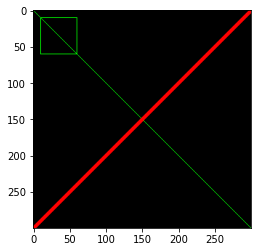

In [ ]:
# рисуем зеленый квадрат 50x50 пикселей, начиная с 10x10
# и заканчивая 60x60
cv2.rectangle(canvas, (10, 10), (60, 60), green)
plt.imshow(canvas)
plt.show()

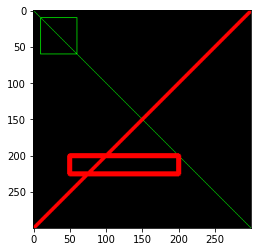

In [ ]:
# draw another rectangle, this time we'll make it red and 5 pixels thick
# рисуем еще один прямоугольник, на этот раз 
# мы сделаем его красным и толщиной 5 пикселей
cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)
plt.imshow(canvas)
plt.show()

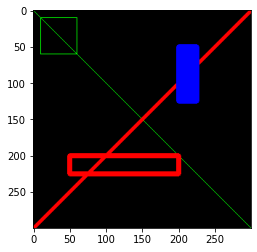

In [ ]:
# let's draw one last rectangle: blue and filled in
# нарисуем последний прямоугольник: синий и c заливкой
blue = (0, 0, 255)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)
plt.imshow(canvas)
plt.show()

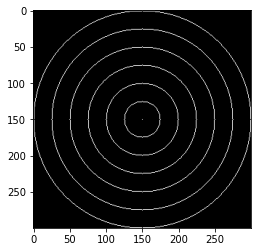

In [ ]:
# reset our canvas and draw a white circle at the center of the canvas with
# increasing radii - from 25 pixels to 150 pixels
# сбрасываем наш холст и рисуем белый круг в центре холста
# с увеличивающимися радиусами - от 25 до 150 пикселей
canvas = np.zeros((300, 300, 3), dtype="uint8")
(centerX, centerY) = (canvas.shape[1] // 2, canvas.shape[0] // 2)
white = (255, 255, 255)

for r in range(0, 175, 25):
	cv2.circle(canvas, (centerX, centerY), r, white)

# show our work of art
# покажем нашу работу
plt.imshow(canvas)
plt.show()

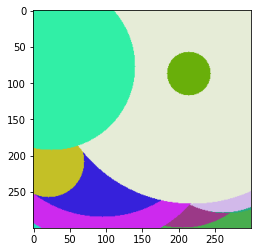

In [ ]:
# let's go crazy and draw 25 random circles
# нарисуем 25 случайных кругов
for i in range(0, 25):
	# randomly generate a radius size between 5 and 200, generate a random
	# color, and then pick a random point on our canvas where the circle
	# will be drawn
    # произвольно генерируем размер радиуса от 5 до 200, 
    # генерируем случайный цвет, а затем 
    # выбираем случайную точку на нашем холсте, 
    # где будет нарисован круг
	radius = np.random.randint(5, high=200)
	color = np.random.randint(0, high=256, size = (3,)).tolist()
	pt = np.random.randint(0, high=300, size = (2,))

	# draw our random circle
    # рисуем наш случайный круг
	cv2.circle(canvas, tuple(pt), radius, color, -1)

# Show our masterpiece
# выведем на экран наше произведение искусства
plt.imshow(canvas)
plt.show()

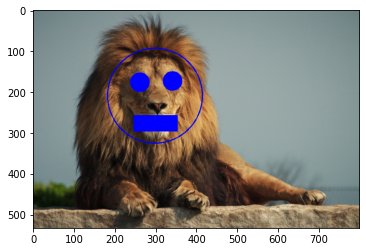

In [ ]:
# load the image
# загружаем изображение льва
image = cv2.imread("lion.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# draw a circle around face, two filled in circles covering eyes, and
# a rectangle surrounding mouth
# нарисуем круг вокруг лица, два заполненных круга, 
# закрывающие глаза, и прямоугольник вокруг рта
cv2.circle(image, (298, 209), 116, (0, 0, 255), 2)
cv2.circle(image, (261, 176), 24, (0, 0, 255), -1)
cv2.circle(image, (341, 173), 24, (0, 0, 255), -1)
cv2.rectangle(image, (246, 257), (353, 296), (0, 0, 255), -1)

# show the output image
# покажем что у нас получилось

plt.imshow(image)
plt.show()